# Preprocessing


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns="EIN")
application_df=application_df.drop(columns="NAME")


application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Look at APPLICATION TYPE value counts for binning
app_type_counts=application_df["APPLICATION_TYPE"].value_counts()
# app_type_counts

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace= list(app_type_counts[app_type_counts<500].index)
#application_types_to_replace

# Replace in dataframe
# Replace function works with follow every row that contains "app" and replace for "Others"
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Look at CLASSIFICATION value counts for binning
app_class_df=application_df["CLASSIFICATION"].value_counts()
# app_class_df

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace=list(app_class_df[app_class_df<500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [5]:

# Convert categorical data to numeric with `pd.get_dummies`
application_df_convert=pd.get_dummies(application_df[["APPLICATION_TYPE","AFFILIATION","CLASSIFICATION","USE_CASE","ORGANIZATION","INCOME_AMT","SPECIAL_CONSIDERATIONS"]])
app_df_final = pd.concat([application_df,application_df_convert],axis=1)
app_df_final= app_df_final.drop(columns=["APPLICATION_TYPE","AFFILIATION","CLASSIFICATION","USE_CASE","ORGANIZATION","INCOME_AMT","SPECIAL_CONSIDERATIONS"])
app_df_final.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [8]:
# Split our preprocessed data into our features and target arrays
y= app_df_final["IS_SUCCESSFUL"].values
X= app_df_final.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

---

In [10]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features=len(X_train_scaled[0])
hidden_nodes_layer1=300
hidden_nodes_layer2=80
hidden_nodes_layer3=60
hidden_nodes_layer4=60

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="sigmoid"))
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="sigmoid"))
# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4,activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               13500     
                                                                 
 dense_1 (Dense)             (None, 80)                24080     
                                                                 
 dense_2 (Dense)             (None, 60)                4860      
                                                                 
 dense_3 (Dense)             (None, 60)                3660      
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                                 
Total params: 46161 (180.32 KB)
Trainable params: 46161 (180.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
# Train the model
fit_model=nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5769 - accuracy: 0.7159
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5589 - accuracy: 0.7271
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7308
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7291
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5499 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7306
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5476 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5467 - accuracy: 0.7321
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5449 - accuracy: 0.7317
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5450 - accura

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5720 - accuracy: 0.7293 - 704ms/epoch - 3ms/step
Loss: 0.572031557559967, Accuracy: 0.7293294668197632


<Axes: >

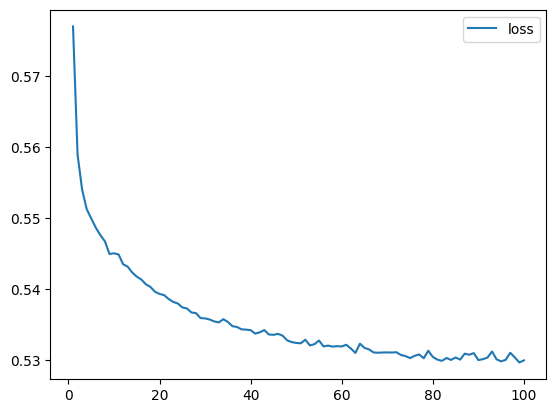

In [14]:
history_df=pd.DataFrame(fit_model.history)
history_df.index+=1
history_df.plot(y="loss")

<Axes: >

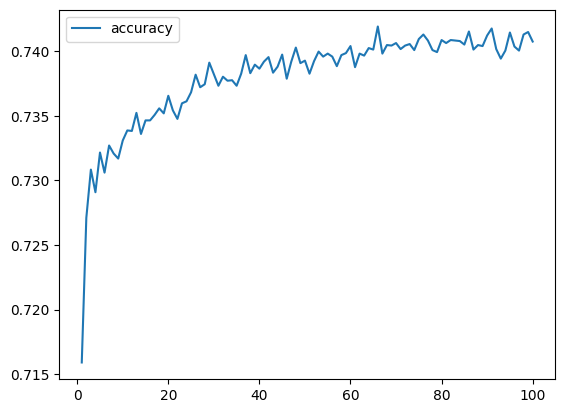

In [15]:
history_df.plot(y="accuracy")

In [16]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Auto Optimization

In [19]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=100,
        max_value=110,
        step=2), activation=activation, input_dim=44))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=100,
            max_value=110,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [21]:
!pip install keras_tuner
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [23]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/2


KeyboardInterrupt: ignored

In [24]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 108,
 'num_layers': 1,
 'units_0': 110,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

In [25]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

NotFoundError: ignored